In [1]:
import gdsfactory as gf

/var/folders/fr/t8w_2pkd0_z3xg500tnxww5c0000gn/T/ipykernel_75319/3941853812.py:1: UserWarning: copy() is deprecated and will be removed in gdsfactory9. Please use dup() instead.
  mzi = gf.components.mzi2x2_2x2_phase_shifter(delta_length=10, length_y=2, length_x=10, bend='bend_euler', straight='straight', straight_x_top='straight_heater_metal', splitter='mmi2x2', combiner='mmi2x2', with_splitter=True, port_e1_splitter='o3', port_e0_splitter='o4', port_e1_combiner='o3', port_e0_combiner='o4', port1='o1', port2='o2', nbends=2, cross_section='strip', mirror_bot=False, add_optical_ports_arms=False, min_length=0.01, auto_rename_ports=True).copy()


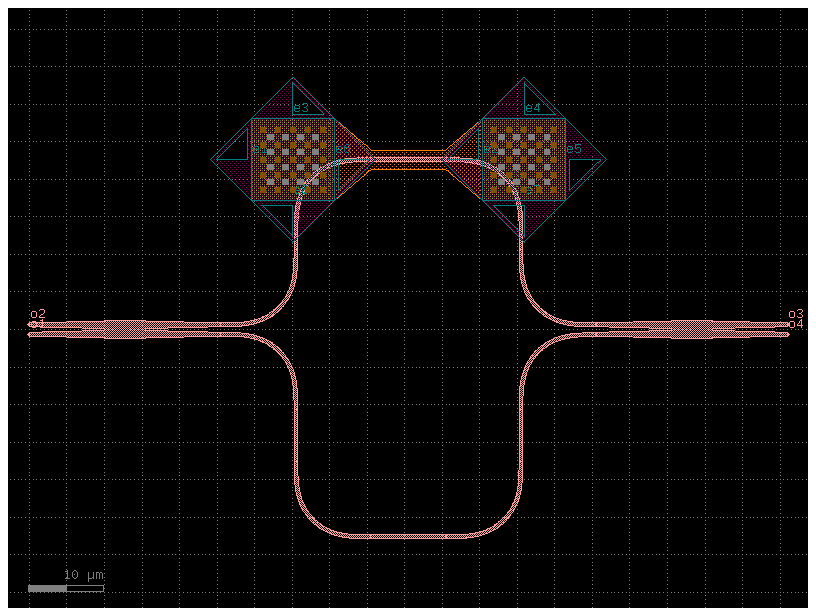

In [2]:
mzi = gf.components.mzi2x2_2x2_phase_shifter(delta_length=10, length_y=2, length_x=10, bend='bend_euler', straight='straight', straight_x_top='straight_heater_metal', splitter='mmi2x2', combiner='mmi2x2', with_splitter=True, port_e1_splitter='o3', port_e0_splitter='o4', port_e1_combiner='o3', port_e0_combiner='o4', port1='o1', port2='o2', nbends=2, cross_section='strip', mirror_bot=False, add_optical_ports_arms=False, min_length=0.01, auto_rename_ports=True).copy()

mzi.draw_ports()

mzi.plot()

/var/folders/fr/t8w_2pkd0_z3xg500tnxww5c0000gn/T/ipykernel_75319/1118603648.py:1: UserWarning: copy() is deprecated and will be removed in gdsfactory9. Please use dup() instead.
  bend_s = gf.components.bend_euler_s(radius=20,p=0.5, with_arc_floorplan=True, cross_section='strip', allow_min_radius_violation=False, port1='o1', port2='o2').copy()


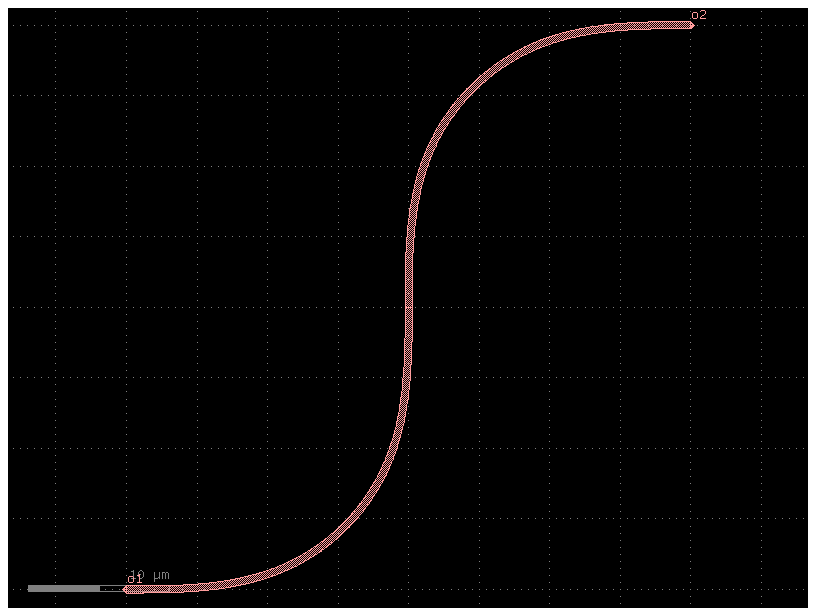

In [3]:
bend_s = gf.components.bend_euler_s(radius=20,p=0.5, with_arc_floorplan=True, cross_section='strip', allow_min_radius_violation=False, port1='o1', port2='o2').copy()

bend_s.draw_ports()

bend_s.plot()

In [4]:
bend_s_mirror = gf.components.bend_euler_s(radius=20, p=0.5, with_arc_floorplan=True, cross_section='strip', allow_min_radius_violation=False, port1='o1', port2='o2').copy()

bend_s_mirror.mirror_y()

bend_s_mirror.draw_ports()

bend_s_mirror.plot()

/var/folders/fr/t8w_2pkd0_z3xg500tnxww5c0000gn/T/ipykernel_75319/290612410.py:1: UserWarning: copy() is deprecated and will be removed in gdsfactory9. Please use dup() instead.
  bend_s_mirror = gf.components.bend_euler_s(radius=20, p=0.5, with_arc_floorplan=True, cross_section='strip', allow_min_radius_violation=False, port1='o1', port2='o2').copy()


AttributeError: 'Cell' object has no attribute 'mirror_y'

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer    ┃ center           ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ p1   │ 0.5   │ 180.0       │ WG (1/0) │ (-50.0, -40.625) │ optical   │
│ p2   │ 0.5   │ 180.0       │ WG (1/0) │ (-50.0, 40.625)  │ optical   │
│ p3   │ 0.5   │ 0.0         │ WG (1/0) │ (131.0, 40.625)  │ optical   │
│ p4   │ 0.5   │ 0.0         │ WG (1/0) │ (131.0, -40.625) │ optical   │
└──────┴───────┴─────────────┴──────────┴──────────────────┴───────────┘

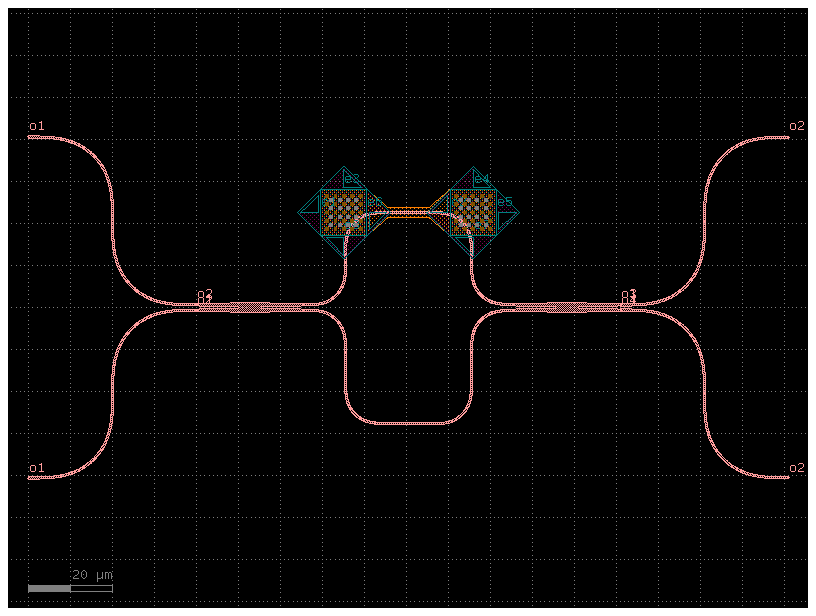

In [ ]:
mzi_cell = gf.Component() # defining new "blank" component as mzi_cell

mzi1 = mzi_cell << mzi # defining new mzi inside mzi_cell as "mzi1"

bends1 = mzi_cell << bend_s # defining new s-bend
bends2 = mzi_cell << bend_s_mirror # defining new mirrored s-bend
bends3 = mzi_cell << bend_s # defining new s-bend
bends4 = mzi_cell << bend_s_mirror # defining new mirrored s-bend

bends1.connect("o2", mzi1.ports["o1"]) # connecting port-"o2"-of-bends1 to port-"o1"-of-mzi1 
bends2.connect("o2", mzi1.ports["o2"], mirror=True) # connecting port-"o2"-of-bends2 to port-"o2"-of-mzi1 
bends3.connect("o1", mzi1.ports["o3"]) # connecting port-"o1"-of-bends3 to port-"o3"-of-mzi1 
bends4.connect("o1", mzi1.ports["o4"], mirror=True) # connecting port-"o1"-of-bends4 to port-"o4"-of-mzi1 

mzi_cell.add_port(name="p1", port=bends1.ports["o1"]) # defining port-"o1"-of-bends1 as port-"p1"-of-mzi_cell
mzi_cell.add_port(name="p2", port=bends2.ports["o1"]) # defining port-"o1"-of-bends2 as port-"p2"-of-mzi_cell
mzi_cell.add_port(name="p3", port=bends3.ports["o2"]) # defining port-"o2"-of-bends3 as port-"p3"-of-mzi_cell
mzi_cell.add_port(name="p4", port=bends4.ports["o2"]) # defining port-"o2"-of-bends4 as port-"p4"-of-mzi_cell

mzi_cell.plot()

mzi_cell.pprint_ports()

In [ ]:
from gdsfactory.generic_tech.layer_stack import get_layer_stack

layer_stack220 = get_layer_stack()

scene = mzi_cell.to_3d(layer_stack=layer_stack220)

scene.show()